In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import glob
import os
import re
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#import ops

from PIL import Image
from resizeimage import resizeimage

In [2]:
cwd = os.getcwd()
cwd

'/Users/twff/Downloads/deep_learning/hw/hw3/script'

In [3]:
df = pd.read_csv('Pokemon.csv', index_col=None, names=None, usecols=['Name', 'Type 1', 'Type 2'])
df.sort_values(by='Name', inplace=True)
df.head()

,Name,Type 1,Type 2
510,Abomasnow,Grass,Ice
511,AbomasnowMega Abomasnow,Grass,Ice
68,Abra,Psychic,NaN
392,Absol,Dark,NaN
393,AbsolMega Absol,Dark,NaN


In [4]:
df.columns=['name', 'type1', 'type2']
type1_dummies = pd.get_dummies(df.type1, prefix=None)
type2_dummies = pd.get_dummies(df.type2, prefix=None)
type_dummies = type1_dummies + type2_dummies
# df_type = pd.concat([df.name, type_dummies, df.type1, df.type2], axis=1)
df_type = pd.concat([df.name, type_dummies], axis=1)
print()
df_type.head()

,name,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
510,Abomasnow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
511,AbomasnowMega Abomasnow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
68,Abra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
392,Absol,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
393,AbsolMega Absol,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
g_idx = 0
d_idx = 0

In [6]:
def g_name():
    global g_idx
    g_idx += 1
    return 'gen_' + str(g_idx)
def d_name():
    global d_idx
    d_idx += 1
    return 'dis_' + str(d_idx)

In [7]:
poke_type = df_type.as_matrix()[:, 1:]
poke_type[1, :].shape

(18,)

In [8]:
# type_names = sorted(df['Type 1'].unique())
# u = dict()
# for i, name in enumerate(type_names):
#     print(i, name, end="; ")
#     for name in df['Type 1']:
#         u[name] = list(df[df['Type 1'] == 'Bug'].Name.unique())

In [9]:
from PIL import Image
import os
#import imghdr
# Resize the scraped images to size 40 by 40
Pokemon_file_path = "/Users/twff/Downloads/deep_learning/hw/hw3/data/Abomasnow"
namelist = ['Abomasnow', 'Aerodactyl', 'Abomasnow', 'Abra', 'Absol', 'Accelgor']
def resize_image(image, size):
    """Resizes an image to the given size."""
    return image.resize(size, Image.ANTIALIAS)

def resize_images(image_dir, output_dir, size):
    """Resizes the images in the image_dir and save into the output_dir."""
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    images = os.listdir(image_dir)
    num_images = len(images)
    for i, image in enumerate(images):
        with open(os.path.join(image_dir, image), 'r+b') as f:
            with Image.open(f) as img:
                #print(imghdr.what(f))
                img = resize_image(img, size)
                #print(img.format)
                img.convert('RGB').save(os.path.join(output_dir, image), img.format)
        if i % 100 == 0:
            print ('[%d/%d] Resized the images and saved into %s.'
                   %(i, num_images, output_dir))
            
for name in namelist:
    image_dir = "/Users/twff/Downloads/deep_learning/hw/hw3/data/%s" %name
    output_dir = "/Users/twff/Downloads/deep_learning/hw/hw3/data/resize/%s" %name
    print(name)
    resize_images(image_dir, output_dir, (40, 40))

# for root, dirs, files in os.walk(Pokemon_file_path):
#     name = root.split('/')[-1]
#     #print(files)
#     for file in files:  # for i, pic in enumerate(glob.glob(path+'pikachu_cute/*.jpg')):
#         if file.endswith((".jpg", ".JPG")):
#             filename = name + "&" + file
#             #print(file)
#             with open(root+'/'+file, 'r+b') as f:
#                 with Image.open(f) as image:
#                     img = resizeimage.resize_thumbnail(image, [40, 40])
#                     img.save(Pokemon_file_path+ '/resize/'+file, img.format)

Abomasnow
[0/23] Resized the images and saved into /Users/twff/Downloads/deep_learning/hw/hw3/data/resize/Abomasnow.
Aerodactyl
[0/28] Resized the images and saved into /Users/twff/Downloads/deep_learning/hw/hw3/data/resize/Aerodactyl.
Abomasnow
[0/23] Resized the images and saved into /Users/twff/Downloads/deep_learning/hw/hw3/data/resize/Abomasnow.
Abra
[0/26] Resized the images and saved into /Users/twff/Downloads/deep_learning/hw/hw3/data/resize/Abra.
Absol
[0/79] Resized the images and saved into /Users/twff/Downloads/deep_learning/hw/hw3/data/resize/Absol.
Accelgor
[0/18] Resized the images and saved into /Users/twff/Downloads/deep_learning/hw/hw3/data/resize/Accelgor.


/Users/twff/anaconda/lib/python3.5/site-packages/PIL/Image.py:874: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [10]:
def plotPoke(x):
    f, a = plt.subplots(2, 8, figsize=(13, 3))
    for i in range(8):
        a[0][i].imshow(x[i])
        a[0,i].axis('off')
        a[1][i].imshow(x[i+8])
        a[1,i].axis('off')
    f.show()
    plt.draw()

In [11]:
# read floder name list
Pokemon_file_path = "/Users/twff/Downloads/deep_learning/hw/hw3/data"
fname_list = list()
name_list = list()
for root, dirs, files in os.walk(Pokemon_file_path, topdown=False):
    for name in dirs:
        fname_list.append(os.path.join(root, name))
        name_list.append(name)
fname_list = fname_list[0:5]
print(fname_list)
print(name_list)


['/Users/twff/Downloads/deep_learning/hw/hw3/data/resize/Abomasnow', '/Users/twff/Downloads/deep_learning/hw/hw3/data/resize/Abra', '/Users/twff/Downloads/deep_learning/hw/hw3/data/resize/Absol', '/Users/twff/Downloads/deep_learning/hw/hw3/data/resize/Accelgor', '/Users/twff/Downloads/deep_learning/hw/hw3/data/resize/Aerodactyl']
['Abomasnow', 'Abra', 'Absol', 'Accelgor', 'Aerodactyl', 'Abomasnow', 'Abra', 'Absol', 'Accelgor', 'Aerodactyl', 'resize']


Input data shape: (174, 40, 40, 3)


/Users/twff/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


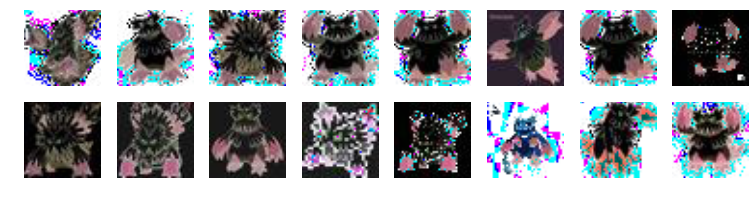

In [32]:
# Create an empty array to store pokemon pics
orig_img = np.empty((0, 40, 40, 3), dtype='float32')
orig_type = np.empty((0, 18), dtype='float32')

# Load all images and append into orig_img
# Load all images'types and append into orig_type
# path = os.path.abspath("./AE_RGB.ipynb")
# path = re.sub('[a-zA-Z\s._]+$', '', path)

path = cwd
kk = 0
imagelist=[]
# for pic in glob.glob(path+'Pokemon/*.png'):
for path in fname_list:
    for pic in glob.glob(path + '/*.jpg'):
        #img = Image.open(pic).convert('RGB')
        img = mpimg.imread(pic)
        img.size
        #bg = Image.new('RGB',img.size,(255,255,255))
        #x,y=img.size
        #bg.paste(img,(0,0,x,y),img)
        #img = bg
        img[img[:,:,2]==0] = np.ones((1,3))
        #print(i)
        img = img[:,:,0:3]
        imagelist.append(img)
        # remove alpha channel  %some alpha=0 but RGB is not equal to [1., 1., 1.]
    
        orig_img = np.append(orig_img, [img], axis=0)
        orig_type = np.append(orig_type, [poke_type[kk, :]], axis=0)
        #print(poke_type[kk, :])
    kk += 1

# Use plt to show original images 
print('Input data shape: {}'.format(orig_img.shape))
plotPoke(orig_img)

In [125]:
orig_img

array([[[[   0.,    3.,    4.],
         [   0.,    9.,   10.],
         [   0.,    3.,    2.],
         ..., 
         [  89.,   96.,  124.],
         [ 115.,  122.,  150.],
         [ 101.,  109.,  132.]],

        [[   0.,    2.,    4.],
         [   0.,    3.,    2.],
         [   0.,    3.,    2.],
         ..., 
         [ 142.,  149.,  178.],
         [ 139.,  146.,  174.],
         [ 139.,  145.,  169.]],

        [[   0.,    3.,    4.],
         [   4.,    8.,    9.],
         [   0.,    1.,    2.],
         ..., 
         [ 174.,  181.,  210.],
         [ 166.,  173.,  202.],
         [   0.,    3.,   29.]],

        ..., 
        [[   0.,    1.,    0.],
         [   0.,    1.,    0.],
         [   3.,    4.,    0.],
         ..., 
         [   0.,    0.,    0.],
         [   8.,    8.,    8.],
         [   0.,    0.,    0.]],

        [[   0.,    1.,    0.],
         [   6.,    7.,    2.],
         [   6.,    7.,    2.],
         ..., 
         [   0.,    0.,    0.],
       

In [15]:
img.size

4800

In [12]:
# Parameters
learning_rate = 0.0001
training_epochs = 50
batch_size = 33
display_step = 5
examples_to_show = 8
kernel_dim = 3
n_kernels = 3

# Network Parameters
n_input = [40, 40, 3] # Pokemon data input (img shape: 40*40*3)
n_channel1 = 16
n_channel2 = 64
n_channel3 = 128
n_disc_2 = 10
n_disc_3 = 30
n_channel4 = 35
gen_dim = 50
type_dim = 18

In [13]:
# tf Graph input
X = tf.placeholder(tf.float32, [batch_size]+n_input) 
Z = tf.placeholder(tf.float32, [batch_size, gen_dim])
Y = tf.placeholder(tf.float32, [batch_size, type_dim])
Z_plus_Y = tf.concat([Z, Y], axis=1)

In [14]:
# Store layers weights & biases
weights = {
    'dis_h1': tf.Variable(tf.truncated_normal([5, 5, 3, n_channel1], stddev=0.01)),
    'dis_h2': tf.Variable(tf.truncated_normal([5, 5, n_channel1, n_disc_2], stddev=0.01)),
    'dis_h3': tf.Variable(tf.truncated_normal([5, 5, n_disc_2, n_disc_3], stddev=0.01)),
    'dis_h4': tf.Variable(tf.truncated_normal([5*5*n_disc_3+type_dim, n_channel4], stddev=0.01)),
    'dis_h5': tf.Variable(tf.truncated_normal([n_channel4, 1], stddev=0.01)),

    'dis_mini': tf.Variable(tf.truncated_normal([40*40*3, n_kernels * kernel_dim], stddev=0.01)),

    'gen_h1': tf.Variable(tf.truncated_normal([gen_dim + type_dim, 5*5*n_channel3], stddev=0.01)),
    'gen_h2': tf.Variable(tf.truncated_normal([5, 5, n_channel2, n_channel3], stddev=0.01)),
    'gen_h3': tf.Variable(tf.truncated_normal([5, 5, n_channel1, n_channel2], stddev=0.01)),
    'gen_dae': tf.Variable(tf.truncated_normal([20*20*n_channel1, gen_dim+type_dim], stddev=0.01)),
    'gen_h4': tf.Variable(tf.truncated_normal([5, 5, 3, n_channel1], stddev=0.01))
}

biases = {
    'dis_h1': tf.Variable(tf.truncated_normal([n_channel1], stddev=0.01)),
    'dis_h2': tf.Variable(tf.truncated_normal([n_disc_2], stddev=0.01)),
    'dis_h3': tf.Variable(tf.truncated_normal([n_disc_3], stddev=0.01)),
    'dis_h4': tf.Variable(tf.truncated_normal([n_channel4], stddev=0.01)),
    'dis_h5': tf.Variable(tf.truncated_normal([1], stddev=0.01)),
    
    'dis_mini': tf.Variable(tf.truncated_normal([n_kernels * kernel_dim], stddev=0.01)),
    
    'gen_h1': tf.Variable(tf.truncated_normal([5*5*n_channel3], stddev=0.01)),
    'gen_h2': tf.Variable(tf.truncated_normal([n_channel2], stddev=0.01)),
    'gen_h3': tf.Variable(tf.truncated_normal([n_channel1], stddev=0.01)),
    'gen_dae': tf.Variable(tf.truncated_normal([gen_dim + type_dim], stddev=0.01)),
    
    'gen_h4': tf.Variable(tf.truncated_normal([3], stddev=0.01))
}

In [15]:
def conv2d(x, W, b, strides=2):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    return tf.nn.bias_add(x, b)

def deconv2d(x, W, b, out_shape, strides=2):
    x = tf.nn.conv2d_transpose(x, W, out_shape, strides=[1, strides, strides, 1], 
                               padding='SAME')
    return tf.nn.bias_add(x, b)

def project(x, W, b):
    return tf.add(tf.matmul(x, W), b)

# Define leaky rectified linear unit (ReLu)
def lrelu(x, leak=0.2, name="lrelu"):
    with tf.variable_scope(name):
        f1 = 0.5 * (1 + leak)
        f2 = 0.5 * (1 - leak)
        return f1 * x + f2 * abs(x)

# Define generate random vector for generator
def sample_Z(m, n):
    return np.random.uniform(-1., 1., size=[m, n]) 

In [16]:
# Define residual layer
def add_residual_pre(prev_layer, z_concat=None, text_filters = None, k_h = 5, k_w = 5, hidden_text_filters = None,
                     hidden_filters = None, name_func=None):
        
        filters = prev_layer.get_shape()[3].value
        if hidden_filters == None:
            hidden_filters = filters * 4
        if text_filters == None:
            text_filters = int(filters/2)
        if hidden_text_filters == None:
            hidden_text_filters = int(filters/8)
        s = prev_layer.get_shape()[1].value
        
        bn0 = ops.batch_norm(name=g_name())
        bn1 = ops.batch_norm(name=g_name())
        
        low_dim = ops.conv2d(ops.lrelu(bn0(prev_layer)), hidden_filters, k_h=k_h, k_w=k_w, name = name_func())
        
        residual = ops.deconv2d(ops.lrelu(bn1(low_dim), name=name_func()), 
            [33, s, s, filters], k_h=k_h, k_w=k_w, name=name_func())
        
        next_layer = prev_layer + residual
        return next_layer

In [26]:
# def linear(input_, output_size, scope=None, stddev=0.02, bias_start=0.0, with_w=False):
#     shape = input_.get_shape().as_list()

#     with tf.variable_scope(scope or "Linear"):
#         matrix = tf.get_variable("Matrix", [shape[1], output_size], tf.float32,
#                                  tf.random_normal_initializer(stddev=stddev))
#         bias = tf.get_variable("bias", [output_size],
#             initializer=tf.constant_initializer(bias_start))
#         if with_w:
#             return tf.matmul(input_, matrix) + bias, matrix, bias
#         else:
#             return tf.matmul(input_, matrix) + bias

In [ ]:
def minibatch_discriminate(inpt, w, b, num_kernels=5, kernel_dim=3):
    
    x = project(inpt, w, b)
    activation = reshape(x, (-1, num_kernels, kernel_dim))
    diffs = tf.expand_dims(activation, 3) - \
        tf.expand_dims(tf.transpose(activation, [1, 2, 0]), 0)
    abs_diffs = tf.reduce_sum(tf.abs(diffs), 2)
    minibatch_features = tf.reduce_sum(tf.exp(-abs_diffs), 2)
    
    return minibatch_features

In [17]:
def generator(z):
    bs = z.get_shape()[0].value
    g_bn0 = ops.batch_norm(name=g_name())
    g_bn1 = ops.batch_norm(name=g_name())
    hidden_g1 = project(z, weights['gen_h1'], biases['gen_h1'])
    hidden_g1 = tf.reshape(hidden_g1, [-1, 5, 5, n_channel3])
    
    output_dim2 = tf.stack([bs, 10, 10, n_channel2])
    hidden_g2 = tf.nn.relu(g_bn0(deconv2d(hidden_g1, weights['gen_h2'], biases['gen_h2'], output_dim2)))
    hidden_g2.set_shape([33, 10, 10, 64])
    hidden_g2 = add_residual_pre(hidden_g2, name_func = g_name)
    
    output_dim3 = tf.stack([bs, 20, 20, n_channel1])
    hidden_g3 = tf.nn.relu(g_bn1(deconv2d(hidden_g2, weights['gen_h3'], biases['gen_h3'], output_dim3)))
    hidden_g3.set_shape([33, 20, 20, 16])

    hidden_g3 = add_residual_pre(hidden_g3, name_func = g_name)
    hidden_dae = tf.reshape(hidden_g3, [bs, -1])
    X_rec = project(hidden_dae, weights['gen_dae'], biases['gen_dae'])
    
    DAE_loss = tf.reduce_mean(tf.square(X_rec - z))
    
    output_dim4 = tf.stack([tf.shape(z)[0], 40, 40, 3])
    hidden_g4 = tf.nn.tanh(deconv2d(hidden_g3, weights['gen_h4'], biases['gen_h4'], output_dim4))
    return hidden_g4, DAE_loss

def discriminator(x, y):
    hidden_d1 = lrelu(conv2d(x, weights['dis_h1'], biases['dis_h1']))
    hidden_d2 = lrelu(conv2d(hidden_d1, weights['dis_h2'], biases['dis_h2']))
    hidden_d3 = lrelu(conv2d(hidden_d2, weights['dis_h3'], biases['dis_h3']))
    hidden_d3 = tf.reshape(hidden_d3, [-1, 5*5*n_disc_3])
    
    mini = minibatch_discriminate(tf.reshape(x, [batch_size, -1]), w = weights['dis_mini'], b = biases['dis_mini'],
                                  num_kernels=n_kernels, kernel_dim=kernel_dim)
    hidden_d3_y = tf.concat([hidden_d3, y, mini], 1)
    
    hidden_d4 = lrelu(project(hidden_d3_y, weights["dis_h4"], biases['dis_h4']))
    hidden_d5 = project(hidden_d4, weights["dis_h5"], biases["dis_h5"])
    
    return hidden_d5

In [18]:
#dist = tf.random_uniform([1], 2, 16, dtype = tf.int32)
#shifted = tf.slice(Y, [0, 2], [batch_size, 18 - dist])

In [19]:
# Construct discriminator and generator
lambda_DAE = 100
dist = 2 #tf.random_uniform([1], 2, 16, dtype = tf.int32)
shifted = tf.slice(Y, [0, 2], [batch_size, 18 - dist])
shifted2 = tf.slice(Y, [0,0],[batch_size, dist])
Y_wrong = tf.concat([shifted, shifted2], 1)

gen_sample, DAE_loss = generator(Z_plus_Y)
dis_real = discriminator(X, Y)
dis_fake = discriminator(gen_sample, Y)
dis_wrong = discriminator(X, Y_wrong)

# Define loss
dis_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
    logits=dis_real, labels=tf.ones_like(dis_real)))
dis_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
    logits=dis_fake, labels=tf.zeros_like(dis_fake)))
dis_loss_wrong = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
    logits=dis_wrong, labels=tf.zeros_like(dis_wrong)))


dis_loss = dis_loss_real + dis_loss_fake + dis_loss_wrong

gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=dis_fake, labels=tf.ones_like(dis_fake)))


t_vars = tf.trainable_variables()
d_vars = [var for var in t_vars if 'dis_' in var.name]
g_vars = [var for var in t_vars if 'gen_' in var.name]

# Optimizer for discriminator
var_dis = [weights[i] for i in weights if re.match('dis', i)]+[biases[i] for i in biases if re.match('dis', i)]
dis_optimizer = tf.train.AdamOptimizer(learning_rate).minimize(dis_loss, var_list= var_dis + d_vars)

# Optimizer for generator parameters
var_gen = [weights[i] for i in weights if re.match('gen', i)]+[biases[i] for i in biases if re.match('gen', i)]
gen_optimizer = tf.train.AdamOptimizer(learning_rate).minimize(gen_loss + lambda_DAE * DAE_loss, var_list= var_gen + g_vars)

In [20]:
# Initializing the variables
init = tf.global_variables_initializer()

# Create session and graph, initial variables
sess = tf.InteractiveSession()
sess.run(init)

In [27]:
# Load previous trained model and rewrite to variables, if exists
# Before run this cell, you have to run the cell above first, to define variables and init it.
weightSaver = tf.train.Saver(var_list=weights)
biaseSaver = tf.train.Saver(var_list=biases)

weightSaver.restore(sess, "saved_model/DCGAN_weights.ckpt")
biaseSaver.restore(sess, "saved_model/DCGAN_biases.ckpt")

print("Model restored.")

Model restored.


In [28]:
total_batch = int(orig_img.shape[0]/batch_size)
# Training cycle
g_loss_train = 0
for epoch in range(100):
    # Loop over all batches
    start = 0; end = batch_size
    for i in range(total_batch-1):
        index = np.arange(start, end)
        np.random.shuffle(index)
        batch_xs = orig_img[index]
        batch_tp = orig_type[index]
        batch_zs = sample_Z(batch_size, gen_dim)
        
        # Run optimization op (backprop) and loss op (to get loss value)
        if g_loss_train < 1.5:
            _, d_loss_train = sess.run([dis_optimizer, dis_loss], feed_dict = {X: batch_xs, Z: batch_zs, Y: batch_tp})
        _, g_loss_train = sess.run([gen_optimizer, gen_loss], feed_dict = {Z: batch_zs, Y: batch_tp})
        
        start = end; end = start+batch_size
    # Display logs per epoch step
    if ((epoch == 0) or (epoch+1) % display_step == 0) or ((epoch+1) == training_epochs):
        print('Epoch: {0:04d}      Discriminator loss: {1:f}      Generator loss: {2:f}'.format(epoch+1, d_loss_train, g_loss_train))

print("Optimization Finished!")

Epoch: 0001      Discriminator loss: 1.787999      Generator loss: 1.290767
Epoch: 0005      Discriminator loss: 1.899646      Generator loss: 1.108077
Epoch: 0010      Discriminator loss: 1.903775      Generator loss: 1.070159
Epoch: 0015      Discriminator loss: 1.905815      Generator loss: 1.058028
Epoch: 0020      Discriminator loss: 1.868583      Generator loss: 1.126578
Epoch: 0025      Discriminator loss: 1.873748      Generator loss: 1.086133
Epoch: 0030      Discriminator loss: 1.896114      Generator loss: 1.100895
Epoch: 0035      Discriminator loss: 1.936886      Generator loss: 1.016064
Epoch: 0040      Discriminator loss: 1.871878      Generator loss: 1.118782
Epoch: 0045      Discriminator loss: 1.893137      Generator loss: 1.092404
Epoch: 0050      Discriminator loss: 1.872469      Generator loss: 1.174880
Epoch: 0055      Discriminator loss: 1.874834      Generator loss: 1.158798
Epoch: 0060      Discriminator loss: 1.910995      Generator loss: 1.098904
Epoch: 0065 

/Users/Viola/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


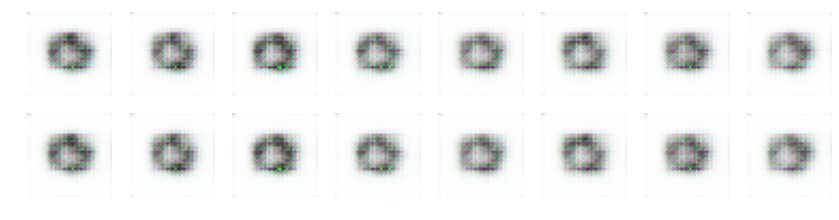

In [29]:
# Let's GENERATE Pokemon !!!!
DCWGAN = sess.run(
    gen_sample, feed_dict={Z: sample_Z(33, gen_dim), Y: batch_tp})

# Compare original images with their reconstructions
f, a = plt.subplots(2, examples_to_show, figsize=(13, 3))
for i in range(examples_to_show):
    a[0][i].imshow(DCWGAN[i])
    a[0,i].axis('off')
    a[1][i].imshow(DCWGAN[i])
    a[1,i].axis('off')
f.show()
plt.draw()

In [30]:
# Save trained Variables 
weightSaver = tf.train.Saver(var_list=weights)
biaseSaver = tf.train.Saver(var_list=biases)
save_path = weightSaver.save(sess, "saved_model/DCGAN_weights.ckpt")
save_path = biaseSaver.save(sess, "saved_model/DCGAN_biases.ckpt")